# Exploración Climática de Victoria Gasteiz

En este proyecto,realicé un análisis  de datos para evaluar el confort climático en laciudad de Victoria Gasteiz. Los datos provienen de fuentes abiertas de la AEMET, y mi objetivo principal fue la creación del Índice de Enfriamiento Eólico y en su representacion grafica. Además, trabajé en la representación gráfica de Givoni para compreender del clima en esta ciudad.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.colors


In [3]:

#Estoy utilizando en este estudio datos climaticos abiertos de la ciudad de Victoria Gasteiz
#Leyendo los datos
datos_climaticos=pd.read_csv("/Users/carolinavega/Documents/UCM/Contaminacion/Victoria2.csv", sep = ";")

In [4]:
# Transponer el DataFrame a un formato mas facil y visual
datos_climaticos = datos_climaticos.set_index('Datos_Climaticos').T


In [5]:
#Cambiando los - que se presnetan en los datos por ceros porque nos van a complicar los calculos en el futuro
datos_climaticos['Recorrido_Vient_Km_mes'] = datos_climaticos['Recorrido_Vient_Km_mes'].replace('-', '0')


In [6]:
#sacando datos NA
datos_climaticos= datos_climaticos.dropna()


In [7]:

#Transformando los datos en tipo float para que me permita hacer los calculos
datos_climaticos['Recorrido_Vient_Km_mes'] = datos_climaticos['Recorrido_Vient_Km_mes'].astype(float)
datos_climaticos['Humedad_Relativa'] = datos_climaticos['Humedad_Relativa'].astype(float)
datos_climaticos['Temperatura'] = datos_climaticos['Temperatura'].astype(float)


In [8]:
#Creando un Dicionario del mes

mapa_de_meses= {
    'Enero': 1,
    'Febrero': 2,
    'Marzo': 3,
    'Abril': 4,
    'Mayo': 5,
    'Junio': 6,
    'Julio': 7,
    'Agosto': 8,
    'Septiembre': 9,
    'Octubre': 10,
    'Noviembre': 11,
    'Diciembre': 12
}

In [9]:
#Creando una nueva columna para añadir el numero del mes en el dataframe
datos_climaticos['Numero_Mes'] = datos_climaticos.index.map(mapa_de_meses)


In [10]:
#creando una funcion para calcular los segundos del mes
def seconds_in_month(month):
    days_in_month = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    days = days_in_month[month]
    return days * 24 * 60 * 60

In [11]:
#Creando una columna para recibir los segundos del mes que es utilizado en el calculo de Indice Eolico
datos_climaticos['Segundos_Del_Mes'] = datos_climaticos['Numero_Mes'].apply(seconds_in_month)


In [12]:
#Transformando el recorrido del viento de km/s a m/s
datos_climaticos['Recorrido_Viento_ms'] = ((datos_climaticos['Recorrido_Vient_Km_mes']*1000)/datos_climaticos['Segundos_Del_Mes']).round(4)


In [13]:
#Calculo del indice de enfriamiento eolico
datos_climaticos['Enfriamiento_Eolico'] = round((10.9 * np.sqrt(datos_climaticos['Recorrido_Viento_ms']) + 9 - datos_climaticos['Recorrido_Viento_ms']) * (33 - datos_climaticos['Temperatura']), 2)


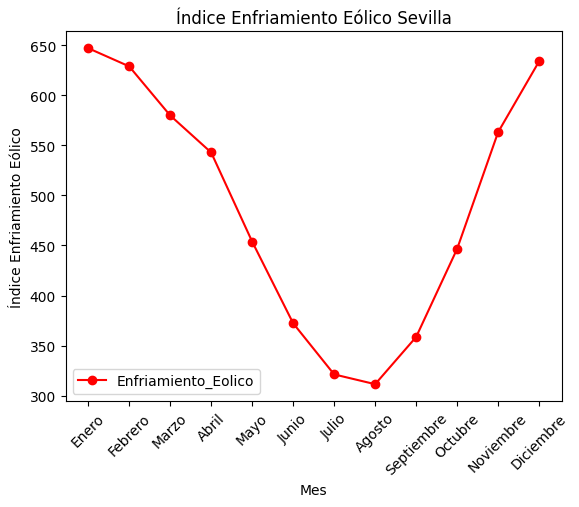

In [14]:
# Crear una figura y ejes
fig, ax = plt.subplots()

# Graficar 'Enfriamiento_Eolico' contra el índice con marcadores
ax.plot(datos_climaticos.index, datos_climaticos['Enfriamiento_Eolico'], marker='o', label='Enfriamiento_Eolico', color='red')

# Establecer etiquetas y título
ax.set_xlabel('Mes')
ax.set_ylabel('Índice Enfriamiento Eólico')
ax.set_title('Índice Enfriamiento Eólico Sevilla')

# Rotar las etiquetas del eje x
ax.tick_params(axis='x', rotation=45)

# Mostrar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()


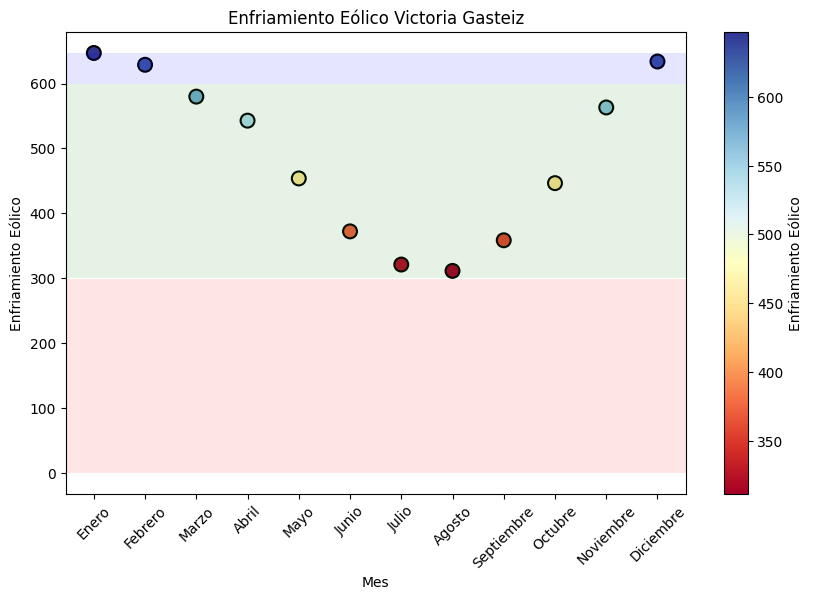

In [15]:
# Definiendo un tamaño mayor para los puntos del gráfico de dispersión
tamano_marcador = 100

# Creando una figura
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar 'Enfriamiento_Eolico' contra el mes con marcadores y color basado en los valores
sc = ax.scatter(
    datos_climaticos.index,
    datos_climaticos['Enfriamiento_Eolico'],
    c=datos_climaticos['Enfriamiento_Eolico'],  # Usar la variable para el color
    cmap='RdYlBu',  # Usar un mapa de colores para los marcadores
    s=tamano_marcador,  # Establecer el tamaño del marcador
    edgecolor='black',  # Agregar bordes negros para una mejor visibilidad
    linewidth=1.5  # Ajustar el ancho del borde
)

# Establecer etiquetas y título
ax.set_xlabel('Mes')
ax.set_ylabel('Enfriamiento Eólico')
ax.set_title('Enfriamiento Eólico Victoria Gasteiz')

# Rotar las etiquetas del eje x
ax.tick_params(axis='x', rotation=45)

# Agregar barra de color
cbar = plt.colorbar(sc, ax=ax, label='Enfriamiento Eólico')

# Personalizar el color de fondo basado en condiciones
ax.axhspan(0, 299, facecolor='red', alpha=0.1)
ax.axhspan(300, 599, facecolor='green', alpha=0.1)
ax.axhspan(600, max(datos_climaticos['Enfriamiento_Eolico']), facecolor='blue', alpha=0.1)

# Mostrar la gráfica
plt.show()


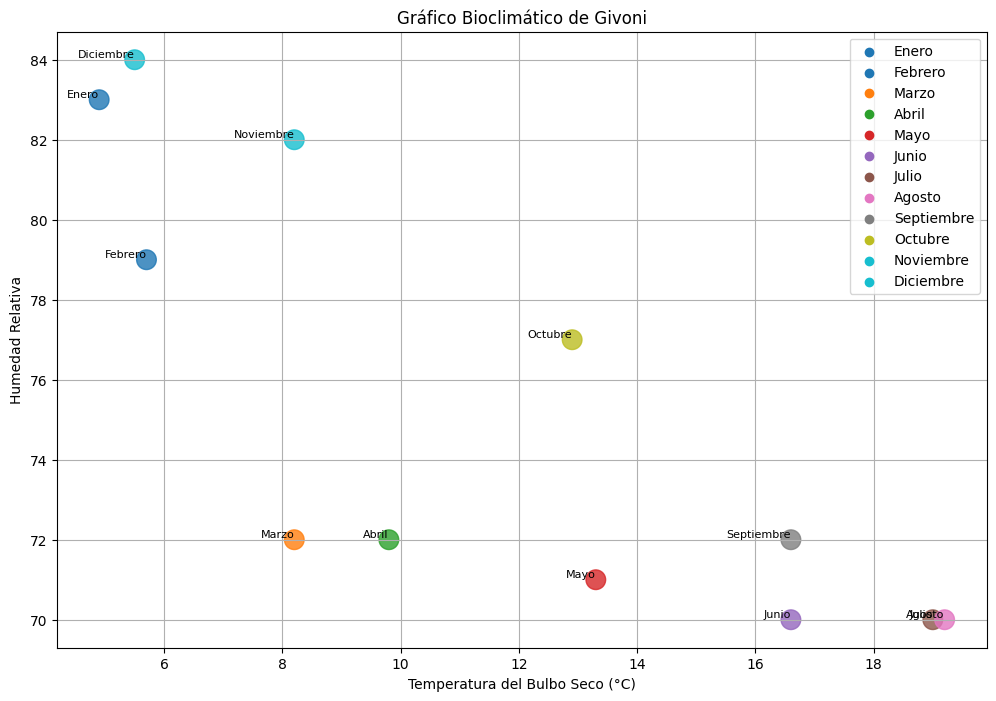

In [17]:
# Crear un gráfico de dispersión
plt.figure(figsize=(12, 8))

# Definir colores únicos para cada valor en el índice
colores_unicos = plt.cm.tab10(np.linspace(0, 1, len(datos_climaticos)))

# Graficar Humidity Ratio contra Dry-Bulb Temperature
dispersion = plt.scatter(
    datos_climaticos['Temperatura'],
    datos_climaticos['Humedad_Relativa'],
    c=colores_unicos,
    s=200,  # Aumentar el tamaño del marcador
    alpha=0.8
)

# Configurar etiquetas y título
plt.xlabel('Temperatura del Bulbo Seco (°C)')
plt.ylabel('Humedad Relativa')
plt.title('Gráfico Bioclimático de Givoni')

# Agregar etiquetas de texto para cada punto con los nombres de los meses
for i, row in datos_climaticos.iterrows():
    plt.text(row['Temperatura'], row['Humedad_Relativa'], i, fontsize=8, ha='right', va='bottom')

# Agregar leyenda para cada valor en el índice
for idx, color in zip(datos_climaticos.index, colores_unicos):
    plt.scatter([], [], color=color, label=idx)

plt.legend()  # Mostrar leyenda

plt.grid(True)

# Mostrar el gráfico
plt.show()
